<a href="https://colab.research.google.com/github/qwertynerd97/ml2020/blob/master/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
Implementing a get_random_data function that returns points classified by which side of a plane they are on, with some deviation

Import all necessary libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Generate the random data

In [0]:
def get_random_data(w, b, mu, sigma, m):
  noise = np.random.default_rng().normal(mu, sigma, m)
  labels = np.random.randint(2, size=m)
  x = np.random.random(m)
  x2 = w * x + b + (-1)**labels * noise
  return labels, np.column_stack((x,x2))

labels, data = get_random_data(3,7,0.3,0.1,1000)

Display the generated data

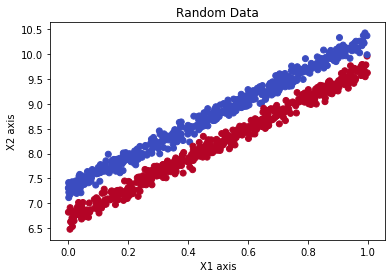

In [0]:
plt.scatter(data[:,0],data[:,1], c=labels, cmap="coolwarm")
plt.title('Random Data')
plt.xlabel('X1 axis')
plt.ylabel('X2 axis')
plt.show()

Then split the data into training and testing sets for further use

In [0]:
trainData = data[:800,:]
trainLabels = labels[:800]
testData = data[800:,:]
testLabels = labels[800:]

# Problem 2
Implement Keras based logistic regression

Import the necessary libraries

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

Set up the model

In [0]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(1, activation='sigmoid'), input_shape=(2,))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Set up the labels as categorical data and fit the network

In [0]:
trainCat = tf.keras.utils.to_categorical(trainLabels)
testCat = tf.keras.utils.to_categorical(testLabels)


network.fit(trainData, trainLabels, epochs=1000, validation_data=(testData, testLabels))

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 0s 359us/sample - loss: 0.8433 - accuracy: 0.5337 - val_loss: 0.6981 - val_accuracy: 0.4650
Epoch 2/1000
800/800 [==============================] - 0s 71us/sample - loss: 0.6905 - accuracy: 0.5275 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/1000
800/800 [==============================] - 0s 64us/sample - loss: 0.6889 - accuracy: 0.5288 - val_loss: 0.7049 - val_accuracy: 0.4800
Epoch 4/1000
800/800 [==============================] - 0s 57us/sample - loss: 0.6887 - accuracy: 0.5300 - val_loss: 0.6947 - val_accuracy: 0.5050
Epoch 5/1000
800/800 [==============================] - 0s 59us/sample - loss: 0.6896 - accuracy: 0.5175 - val_loss: 0.6911 - val_accuracy: 0.5100
Epoch 6/1000
800/800 [==============================] - 0s 62us/sample - loss: 0.6893 - accuracy: 0.5238 - val_loss: 0.6928 - val_accuracy: 0.5050
Epoch 7/1000
800/800 [==============================] - 0s 61us/sample 

Determine the success of the model

2.258733 -0.6419656 4.3690305
3.518464 6.805708


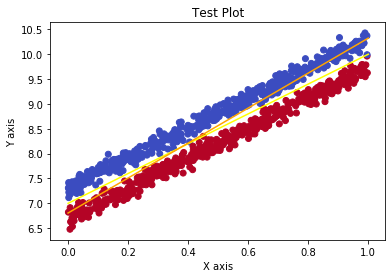

In [0]:
weights = network.get_weights()[:1]
bias = network.get_weights()[1:][0][0]
x1_weight = weights[0][0][0] # X1 is the first value in the weights
x2_weight = weights[0][1][0] # X2 is the second value in the weights
print(x1_weight, x2_weight, bias)

# Original equation: x2 = w * x + b + (-1)**labels * noise
# Solve for w and b
w = -x1_weight/x2_weight
b = -bias/x2_weight
print(w, b)

plt.scatter(data[:,0],data[:,1], c=labels, cmap="coolwarm")

x = np.linspace(0, 1, 1000)
plt.plot(x, x*3 + 7, color='yellow', label='True Line')
plt.plot(x, x*w + b, color='orange', label='ML Line')
plt.title('Test Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

Display the neural network's heatmap

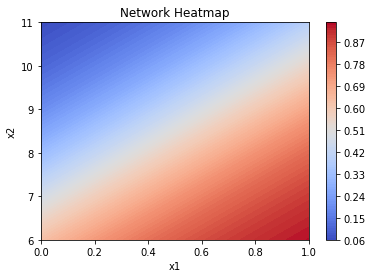

In [0]:
# Create data
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(6, 11, 100)
X1, X2 = np.meshgrid(x1, x2)

# Create labels based on x1 and x2
X1_flat = X1.flatten()
X2_flat = X2.flatten()
y = np.column_stack((X1_flat, X2_flat))
Y = network.predict(y)
Y = Y.reshape((100,100))

# Draw the heatmap
contours = plt.contourf(X1, X2, Y, 100, cmap='coolwarm')
plt.colorbar()

plt.title("Network Heatmap")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Problem 3
Implement a logistic regression from scratch
Start with the basic setup

In [0]:
# number of epochs
epochs = 2000
# learning rate
lr = 0.05
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weights = np.random.randn(3, 1)

Set necessary methods

In [200]:
weights = initial_weights
weight_path = []
batch_size = 4

def sigmoid(num):
  return 1 / (1 + np.exp(-num))

def binary_cross_loss (a, data, y):
  return np.array([(a-y) * data]).T

weight_path.append(weights)
dataWithBias = np.column_stack((trainData, np.ones(shape=(800, 1))))
print(dataWithBias)
for epoch in range(epochs):
  for j in range(800):
    z = np.dot(dataWithBias[j], weights)
    a = sigmoid(z)

    gradient = (1/800) * binary_cross_loss(a, dataWithBias[j], trainLabels[j])
    
    weights = weights - lr * gradient

print(weights)

[[0.20468687 7.42488071 1.        ]
 [0.26301704 7.97038896 1.        ]
 [0.16545296 7.26049751 1.        ]
 ...
 [0.1832279  7.65949856 1.        ]
 [0.5724828  9.02985716 1.        ]
 [0.19610134 7.16593064 1.        ]]
[[ 1.34521408]
 [-0.34753553]
 [ 2.31330035]]


Test the built-from-scratch network

[3.87072386] [6.6562988]


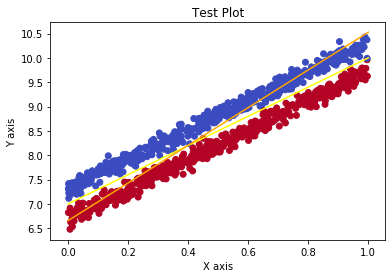

In [201]:
# Original equation: x2 = w * x + b + (-1)**labels * noise
# Solve for w and b
manualW = -weights[0]/weights[1]
manualB = -weights[2]/weights[1]
print(manualW, manualB)

plt.scatter(data[:,0],data[:,1], c=labels, cmap="coolwarm")

x = np.linspace(0, 1, 1000)
plt.plot(x, x*3 + 7, color='yellow', label='True Line')
plt.plot(x, x*manualW + manualB, color='orange', label='ML Line')
plt.title('Test Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

It can also be displayed as a heatmap

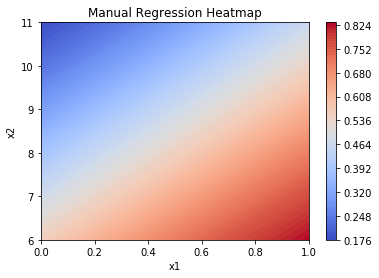

In [206]:
# Create data
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(6, 11, 100)
X1, X2 = np.meshgrid(x1, x2)

# Create labels based on x1 and x2
X1_flat = X1.flatten()
X2_flat = X2.flatten()
y = np.column_stack((X1_flat, X2_flat, np.ones(shape=(10000, 1))))
Y = sigmoid(np.dot(y, weights))
Y = Y.reshape((100,100))

# Draw the heatmap
contours = plt.contourf(X1, X2, Y, 100, cmap='coolwarm')
plt.colorbar()

plt.title("Manual Regression Heatmap")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()